In [23]:
import numpy as np 
import matplotlib.pyplot as plt
import librosa
import librosa.display as ld
import scipy.signal as signal

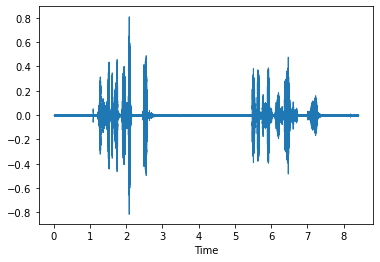

In [24]:
x,sr=librosa.load("./media/dg105.wav",sr=8000)
ld.waveshow(x,sr=sr)

In [25]:
N=128
R=N//2
mfccs=librosa.feature.mfcc(y=x,sr=sr,n_mfcc=64,n_fft=N,hop_length=R)
print(mfccs.shape)
mfccs=mfccs.T

(64, 1051)


/home/prasad/anaconda3/envs/aec/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  return f(*args, **kwargs)


In [26]:
noise_mfcc=np.zeros(64)
m=x.shape[0]
n=((m//R)+1)*R
flag=np.zeros(n)
alpha=0.8
scale=2
initial=(200*sr//(R*1000))/2
print(initial)
for i in range(0,mfccs.shape[0]):
    #print(mfccs[i,:].shape)
    if(i<initial):
        #get the noise template in the first 25 ms
        noise_mfcc+=mfccs[i]/initial
        threshold=np.mean(noise_mfcc**2)
    else:
        dth=np.linalg.norm(mfccs[i]-noise_mfcc)**2
        if(dth>scale*threshold):
            flag[i*R:i*R+R]=np.ones(R)
        else:
            flag[i*R:i*R+R]=np.zeros(R)
            threshold=threshold*alpha+(1-alpha)*dth
        

12.5


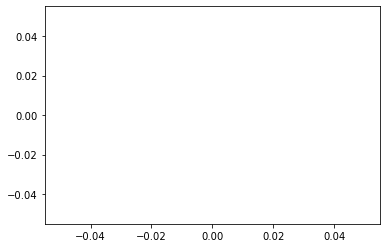

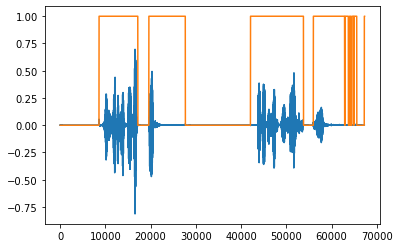

In [27]:
plt.figure()
offset=5000000
plt.plot(x[offset:offset+80000])
plt.plot(flag[offset:offset+80000])

plt.figure()
plt.plot(x)
plt.plot(flag)

In [28]:
def rms(x):
    alpha=0.9375
    b=[1,alpha]
    a=[1-alpha]
    y=x**2
    rmsy2=signal.lfilter(b,a,y)
    rmsy=np.sqrt(np.mean(rmsy2))
    return rmsy

In [31]:
flag=flag[:x.shape[0]]
noise=x[np.where(flag==0)]
sig=x[np.where(flag==1)]

rms_noise=rms(noise)
rms_sig=rms(sig)

snr=20*np.log10(rms_sig/rms_noise)

print("SNR:",snr,"dB")

SNR: 27.3043515163645 dB
